# Mandy's Breast Cancer Campaign Project Part 2 - Training and testing


## Important note  - the model comments and decisions were made previous to correcting an error in the train/test/split, the error itself is now fixed but I did not redo my modelling notes/choices 

In [1]:
# First our imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Then our dataset - if we recall i hadn't yet fixed the extra column with the row numbers so make sure to drop that first
# Also for the steps i'll need a copy of it without the features narrowed down further.

In [4]:
dataset1 = pd.read_csv('data_refined.csv')
dataset = dataset1.drop(["Unnamed: 0"], axis = 1)

dataset_original = dataset.copy() # per instructions we will want a copy before we reduce features to compare anything further with _original utilizes this

dataset.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,...,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,...,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,...,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391


So my thoughts here are to narrow down the features more, lets maybe loosen up the correlation threshhold and use a heatmap to narrow down the features.  I started at 0.90 from the last one which left me with 21 features, too many I think for this so let's bump that down. we'll visualize the table with the original correlation first here.

In [5]:
correlation_threshold = 0.70

correlated_pairs = np.abs(dataset.corr()) > correlation_threshold
print("\nCorrelation Table with Filter Applied:"), display(correlated_pairs)

correlated_pairs = np.column_stack(np.where(np.abs(dataset.corr()) > correlation_threshold))


Correlation Table with Filter Applied:


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
diagnosis,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
radius_mean,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
texture_mean,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
smoothness_mean,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
compactness_mean,False,False,False,False,True,True,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
concavity_mean,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
symmetry_mean,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
radius_se,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
texture_se,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [6]:
drop_list = []
# Drop one column from each correlated pair
for col1, col2 in correlated_pairs:
    #print(col1, col2)
    if col1 == "diagnosis" or col2 == "diagnosis":
        pass
    if col1 != col2 and col1 < col2:
        col_to_drop = dataset.columns[col2]
        #print(col_to_drop)
        if col_to_drop in drop_list:
            pass
        else:
            drop_list.append(col_to_drop)
       #Commenting this for a bit less clutter but keeping in case you want to see print(drop_list)
        
drop_filter = dataset.filter(drop_list)
dataset.drop(drop_filter, inplace = True, axis=1)

In [7]:
#print(f"DataFrame after dropping correlated columns (threshold={correlation_threshold}):") ended up with 11 columns though not saying it
dataset.head(3)
dataset.columns
len(dataset.columns)

11

In [8]:
dataset_original.head(3) #making sure the copy worked and has all the features still for the comparison

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,...,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,...,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,...,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391


In [9]:
list(dataset.columns.values) #List of the remaining features after reducing by broadening the correlation

['diagnosis',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'symmetry_worst']

Text(0.5, 1.0, 'Correlated Heatmap on reduction')

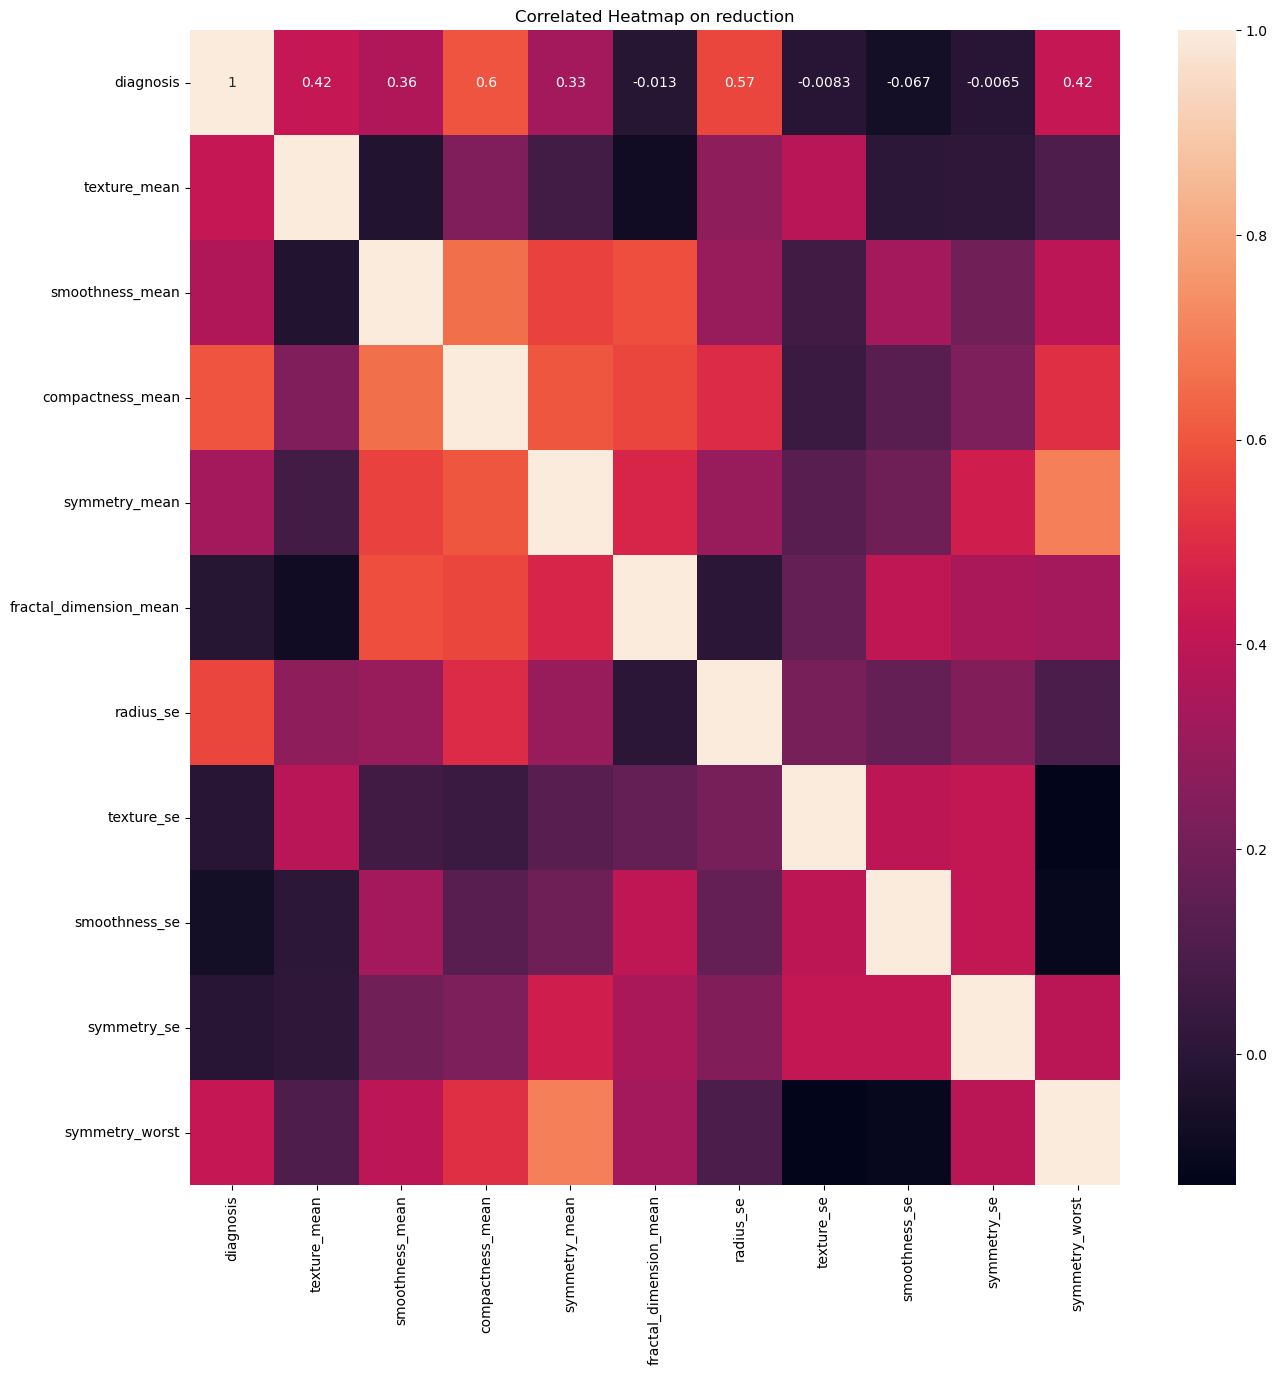

In [10]:
#let's visualize the remaining with a heatmap to see if the smoothness and symetry, as there are two different features of with those
#as part of the title i'm not sure if they maybe should be removed?  However they do see different based on the heatmap so not yet.
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True).set_title('Correlated Heatmap on reduction')



In [11]:
encoded_y = dataset.iloc[:, 0].values
encoded_x = dataset.iloc[:, 1:11].values

# train is now 80% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size=0.2)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) 

# uncomment to see if you want below, just tidying
#print(X_train, X_val, X_test)


In [12]:
#We  need to do the same with our original data to compare
encoded_y_original = dataset_original.iloc[:, 0].values
encoded_x_original = dataset_original.iloc[:, 1:21].values

# train is now 80% of the entire data set
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(encoded_x_original, encoded_y_original, test_size=0.2)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val_original, X_test_original, y_val_original, y_test_original = train_test_split(X_test_original, y_test_original, test_size=.5) 

# uncomment to see if you want below, just tidying
#print(X_train_original, X_val_original, X_test_original)

## Training classifiers starting  with KNN

### Original data with confusion matrix
I went a bit overboard here by doing two full versions of this one with the original data and one with only the 11 features remaining.  However I really felt like doing this as an exercise was connecting some of the dots in my head in putting together different things that we had done and visualizing (though I still find i'm struggling with what the data means yet at the end a bit)

So while this is a lot in the sections below it was really helpful for me to see where I need to make adjustments a bit and more of an exploratory exercise for myself I guess.

In [13]:
# Make a loop to run a range of nearest neighbours to find the best model starting small

err_rate_original = []
accuracy_original = []

for i in range(2,22):
    knn_original = KNeighborsClassifier(n_neighbors = i)
    knn_original.fit(X_train_original, y_train_original)
    predictions_i_original = knn_original.predict(X_test_original)
    
    err_rate_original.append(np.mean(predictions_i_original != y_test_original))
    accuracy_original.append(knn_original.score(X_test_original, y_test_original))

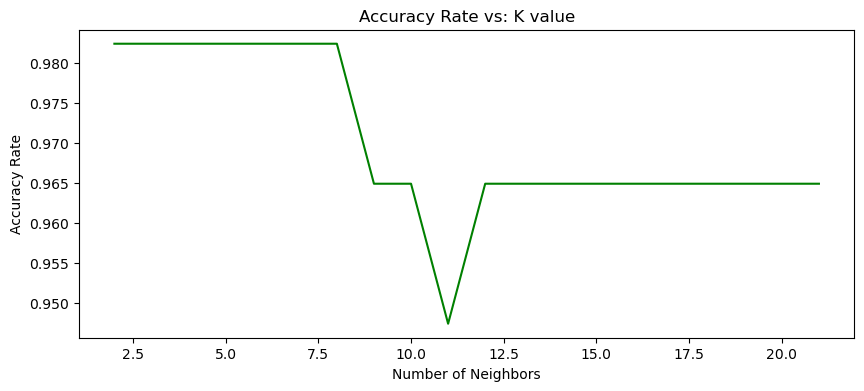

In [14]:
#let's visualize it with a plot too
plt.figure(figsize = (10,4))

#plt.plot(range(2,22), err_rate_original, color ="green" ) We switched from err_rate to accuracy just to make sure it was functioning properly
#It is just not so much with 1 neighbour so we changed range to minimum of 2 as it was causing issues 
plt.plot(range(2,22), accuracy_original, color ="green" )
plt.title("Accuracy Rate vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Rate")

plt.show()

In [15]:
min(err_rate_original)

0.017543859649122806

In [16]:
min(err_rate_original)
best_knn_original = err_rate_original.index(min(err_rate_original)) + 1 #Could use 'min(err_rate)' instead of hardcoding 0.07 
print(best_knn_original)

1


In [17]:
# Run the best model

best_knn_model_original = KNeighborsClassifier(n_neighbors = best_knn_original)
best_knn_model_original.fit(X_train_original, y_train_original)
predictions_best = best_knn_model_original.predict(X_test_original)

print(best_knn_model_original.score(X_test_original, y_test_original))

0.9649122807017544


[[35  2]
 [ 0 20]]


Text(0.5, 1.0, 'Breast Cancer Predictions Heat Map')

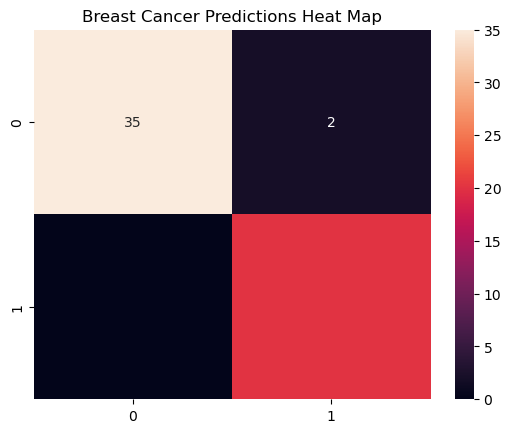

In [18]:
predictions_original = best_knn_model_original.predict(X_test_original)
print(confusion_matrix(y_test_original, predictions_original))
sns.heatmap(confusion_matrix(y_test_original,predictions_original), annot = True).set_title("Breast Cancer Predictions Heat Map")

In [19]:
best_knn_model_original.score(X_test_original, y_test_original)

0.9649122807017544

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test_original, predictions_original).ravel()
print("True Positives:",tp)
print("True Negatives:", tn)

True Positives: 20
True Negatives: 35


### Reduced features with confusion matrix
So again this may seem like a lot but i really want to see them  one after the other through the different parts to get a better grasp to go from 

In [21]:
# Make a loop to run a range of nearest neighbours to find the best model starting small

err_rate = []
accuracy = []

for i in range(2,22):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    
    err_rate.append(np.mean(predictions_i != y_test))
    accuracy.append(knn.score(X_test, y_test))

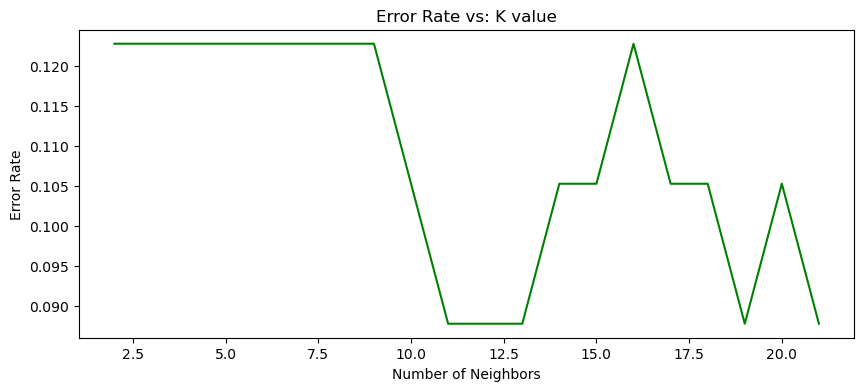

In [22]:
#let's visualize it with a plot too ** Keep in mind this is using error rate where above just for testing instead we used accuracy
plt.figure(figsize = (10,4))

plt.plot(range(2,22), err_rate, color ="green" )
plt.title("Error Rate vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Error Rate")

plt.show()

In [23]:
min(err_rate)

0.08771929824561403

In [24]:
min(err_rate)
best_knn = err_rate.index(min(err_rate)) + 1 #Could use 'min(err_rate)' instead of hardcoding 0.07 
print(best_knn)

10


In [25]:
# Run the best model

best_knn_model = KNeighborsClassifier(n_neighbors = best_knn)
best_knn_model.fit(X_train, y_train)
predictions_best = best_knn_model.predict(X_test)

print(best_knn_model.score(X_test, y_test))

0.8947368421052632


[[33  1]
 [ 5 18]]


Text(0.5, 1.0, 'Reduced Features for Breast Cancer Predictions Heat Map')

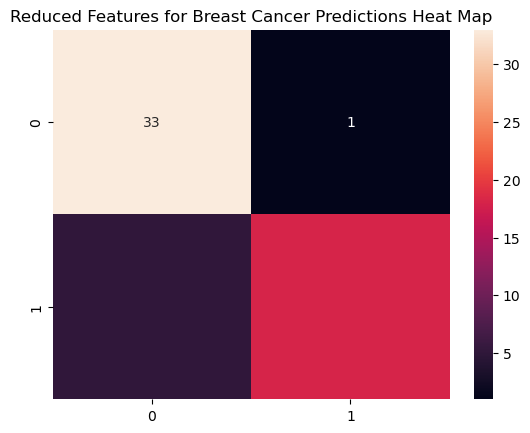

In [26]:
predictions = best_knn_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot = True).set_title("Reduced Features for Breast Cancer Predictions Heat Map")

In [27]:
best_knn_model.score(X_test, y_test)

0.8947368421052632

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Positives:",tp)
print("True Negatives:", tn)

True Positives: 18
True Negatives: 33


In [29]:
# Training classifiers with Random Forest

In [30]:
#original data with confusion matrix

In [31]:
model_RF_original = RandomForestClassifier(n_estimators = 10, # Default is 100
                                  bootstrap = True) # If false, then all features will be used in each tree ("bagging")
                                                    # class_weight allows you to add weighting ("boosting") 

In [32]:
model_RF_original.fit(X_train_original, y_train_original)

RandomForestClassifier(n_estimators=10)

In [33]:
y_pred_RF_original = model_RF_original.predict(X_test_original)

In [34]:
print(confusion_matrix(y_test_original,      y_pred_RF_original))
print(classification_report(y_test_original, y_pred_RF_original))

[[36  1]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.98        20

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



In [35]:
model_RF_original.score(X_test_original, y_test_original)

0.9824561403508771

In [36]:
#reduced features with confusion matrix

In [37]:
model_RF = RandomForestClassifier(n_estimators = 10, # Default is 100
                                  bootstrap = True) # If false, then all features will be used in each tree ("bagging")
                                                    # class_weight allows you to add weighting ("boosting") 

In [38]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
y_pred_RF = model_RF.predict(X_test)

In [40]:
print(confusion_matrix(y_test,      y_pred_RF))
print(classification_report(y_test, y_pred_RF))

[[32  2]
 [ 1 22]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.92      0.96      0.94        23

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



In [41]:
model_RF.score(X_test, y_test)

0.9473684210526315

#### This had a very high score, much better than the KNN for this dataset it appears so far, next i'll try SVC

In [42]:
# Training classifiers with SVC

In [43]:
#original data with confusion matrix

In [44]:
# Create an instance of 'svm_model' with the RBF Kernel
svm_model_original = SVC(max_iter = 1000,
               kernel = "rbf",
               C= 1.0,
               gamma = 'scale'
               ) # max_iter is not required, but can prevent crashing when models don't converge as the default is unlimited iterations

In [45]:
svm_model_original.fit(X_train_original, y_train_original) 

SVC(max_iter=1000)

In [46]:
# Guess what, time to do the predictions!
predictions_original = svm_model_original.predict(X_test_original)
svm_model_original.score(X_test_original,y_test_original)

0.9649122807017544

In [47]:
print(confusion_matrix(y_test_original,predictions_original))
print(classification_report(y_test_original,predictions_original))

[[35  2]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.91      1.00      0.95        20

    accuracy                           0.96        57
   macro avg       0.95      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57



In [48]:
#reduced features with confusion matrix

In [49]:
# Create an instance of 'svm_model' with the RBF Kernel
svm_model = SVC(max_iter = 1000,
               kernel = "rbf",
               C= 1.0,
               gamma = 'scale'
               ) # max_iter is not required, but can prevent crashing when models don't converge as the default is unlimited iterations

In [50]:
svm_model.fit(X_train, y_train) 

SVC(max_iter=1000)

In [51]:
# Guess what, time to do the predictions!
predictions = svm_model.predict(X_test)
svm_model.score(X_test,y_test)

0.9824561403508771

In [52]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[33  1]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.96      1.00      0.98        23

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



#### Just for fun linear version

In [53]:
svm_model = SVC(max_iter = 1000,
               kernel = "linear",
               C= 1.0,
               )

svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9122807017543859

#### SVC RBF was better than KNN but not as good as Random Forest it appears, linear wasn't as good as RBF, the top performer was by far the Random forest model and the next best was the SVC run with RBF (not linear though).

